### Digits_PCA_NN

In [4]:
from ForExam.CP.DeepNeuralNetwork.neuralnet.second_version import *

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Relu(Operation):
    def __init__(self) -> None:
        super().__init__()
    
    def _output(self, inference: bool) -> ndarray: 
        return np.maximum(0,self.input_)

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        self.output[self.output <= 0] = 0
        self.output[self.output > 0] = 1
        return output_grad * self.output 

class LeakyRelu(Operation):
    def __init__(self) -> None:
        super().__init__()
    
    def _output(self, inference: bool) -> ndarray: 
        return np.maximum(0.2*self.input_,self.input_)

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        dz = np.ones_like(self.output)
        dz[self.output<0] = 0.2
        return output_grad * dz


In [7]:
class BinaryCrossEntropy(Loss):
    def __init__(self, eps: float=1e-9):
        super().__init__()
        self.eps = eps

    def _output(self) -> float:

        # clipping the softmax output to prevent numeric instability
        #numpy.clip(a, a_min, a_max, out=None, **kwargs)
        #To prevent extremely large loss values that could lead to numeric instability, 
        #we’ll clip the output of the softmax function to be no less than 10–7 and no greater than 10^7
        self.prediction = np.clip(self.prediction, self.eps, 1 - self.eps)

        # actual loss computation
        binary_cross_entropy_loss = (
            -1.0 * self.target * np.log(self.prediction) - \
                (1.0 - self.target) * np.log(1 - self.prediction)
        )
        
        #return average loss
        return np.sum(binary_cross_entropy_loss) / self.prediction.shape[0]

    def _input_grad(self) -> ndarray:
        #return average grad
        return (self.prediction - self.target) / self.prediction.shape[0]


In [8]:
# from sklearn.datasets import load_digits
# import copy
# X,y = load_digits(return_X_y = True)
# print('shapes of X, y')
# print(X.shape,y.shape)

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

#### Dimension reduction

In [10]:
#### Main Code

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

##### Main Code

In [31]:
#### PCA with Sklearn
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


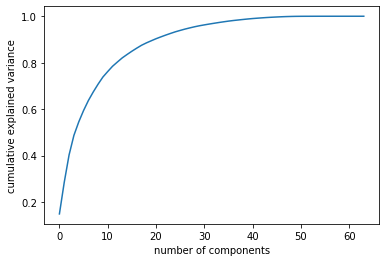

In [32]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# rng = np.random.RandomState(1)

# def PCA(X, n_components=1):
#     #1. center the data (center the data, not features, thus axis=0)
#     mean = np.mean(X, axis=0)
#     X = (X - mean)
    
#     print(n_components)

#     #2. find covariance
#     #the reason we can X.T @ X right away since we already 
#     #center the data)
#     #did not really use this variable
#     cov = (X.T @ X) / (X.shape[0] - 1)
    
#     #3. Then simply find the eigenvalues using np.linalg.eig 
#     #by inputting the covariance matrix
#     eigenvalues, eigenvectors = np.linalg.eigh(cov)
     
#     print("Eigenvalue shape: ", eigenvalues.shape) #(n, )
#     print("Eigenvectors shape: ", eigenvectors.shape) #(n, n)

#     #4. Your n'th principal components will be your first n'th eigenvectors with highest eigenvalues
#     ix = np.argsort(eigenvalues)[::-1] #sort them from biggest to smallest thus -1

#     if(n_components > eigenvalues.shape[0]):
#         raise Exception("You cannot have n_components more than number of features!")
#     else:
#         eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
#         #get the first nth components
#         eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

#     print("eigen: ", eigenvalues)
#     print("sum: ", np.sum(eigenvalues))
#     print("np.cumsum: ", np.cumsum(eigenvalues))
#     print("eigenvector shape: ", eigenvectors.shape)
#     #define how much variance is gained after n' component
#     variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)

#     #projected new vector
#     #during projection, eigenvectors mush be arranged in columns
#     projected_X = X @ eigenvectors
    
#     #print all info
#     print("Variance explained_ratio: ", variance_explained_ratio) #first component got 97%
#     print("Eigenvalues: ", eigenvalues)
#     print("Eigenvectors (column-wise): ", eigenvectors)
#     print("Mean: ", mean)
#     print("Old X shape: ", X.shape)
#     print("Projected X shape: ", projected_X.shape)
    
#     #return only n_components eigenvalues and vectors
#     return eigenvalues, eigenvectors, mean, projected_X

# #copy code from the lectures to plot the eigen values and vectors
# def draw_vector(v0, v1, ax=None):
#     ax = ax or plt.gca()  #get current axis
#     arrowprops=dict(arrowstyle='->',
#                     linewidth=2,
#                     shrinkA=0, shrinkB=0)
#     ax.annotate('', v1, v0, arrowprops=arrowprops)


2
Eigenvalue shape:  (2,)
Eigenvectors shape:  (2, 2)
eigen:  [179.0069301  163.71774688]
sum:  342.72467697963083
np.cumsum:  [179.0069301  342.72467698]
eigenvector shape:  (2, 2)
Variance explained_ratio:  [0.52230534 1.        ]
Eigenvalues:  [179.0069301  163.71774688]
Eigenvectors (column-wise):  [[-1.00000000e+00 -3.51087544e-15]
 [ 3.51087544e-15 -1.00000000e+00]]
Mean:  [ 6.42533080e-17 -7.11728951e-16]
Old X shape:  (1797, 2)
Projected X shape:  (1797, 2)


(-34.843625802421, 34.31340329341907, -32.97153367565289, 30.373780085320046)

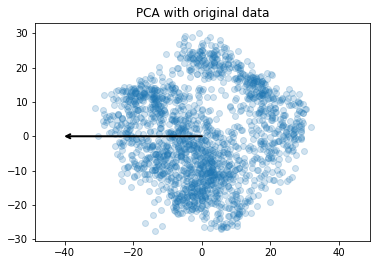

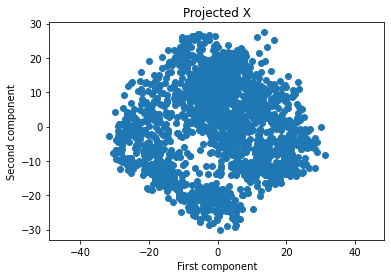

In [22]:
# #main code
# eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

# #looking at the original graph with the loadings
# plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# #.T so each row is eigenvector, so we can loop
# for length, vector in zip(eigenvalues, eigenvectors.T):
#     #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
#     #https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another
#     v = vector * 3 *  np.sqrt(length)
#     draw_vector(mean, mean + v)
# plt.axis('equal')
# plt.title('PCA with original data')

# #projection
# #you can see that lots of data in the second components is gone
# plt.figure()
# plt.scatter(projected_X[:, 0], projected_X[:, 1])
# plt.xlabel("First component")
# plt.ylabel("Second component")
# plt.title("Projected X")
# plt.axis('equal')

### DeepNeuralNetwork

In [23]:
# X = projected
X = projected_X
y = digits.target

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3, shuffle=True, random_state=42)

#since our train function assumes y to be shape of (n, 1)
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)



shapes of X_train, y_train
(1257, 2) (1257, 1)
shapes of X_test, y_test
(540, 2) (540, 1)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn import preprocessing
onehot = preprocessing.OneHotEncoder()

#sklearn expects a 2D array thus we have to reshape to (-1, 1)
y_train_encode = onehot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encode = onehot.fit_transform(y_test.reshape(-1, 1)).toarray()

print(y_train_encode.shape, y_test_encode.shape)

(1257, 10) (540, 10)


In [27]:
#define a simple accuracy function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def calc_accuracy_multinomial_classification(model, X_test, y_test):    
    #getting the accuracy score with testing data
    preds = model.forward(X_test)
    preds = np.argmax(preds, axis=1)
    print("Accuracy: ", accuracy_score(y_test, preds))
    print("Classification Report: ", classification_report(y_test, preds))

In [28]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

In [29]:
trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9,
                                    final_lr=0.05, decay_type='exponential'))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

print('========= Accuracy ========')
calc_accuracy_multinomial_classification(model, X_test, y_test)

Validation loss after 10 epochs is 1.705
Validation loss after 20 epochs is 1.593
Loss increased after epoch 30, final loss was 1.593, using the model from epoch 20
========= Accuracy ========
Accuracy:  0.6111111111111112
Classification Report:                precision    recall  f1-score   support

           0       0.78      0.89      0.83        53
           1       0.74      0.46      0.57        50
           2       0.55      0.81      0.66        47
           3       0.87      0.37      0.52        54
           4       0.96      0.83      0.89        60
           5       0.28      0.12      0.17        66
           6       0.73      0.85      0.78        53
           7       0.56      0.49      0.52        55
           8       0.30      0.58      0.40        43
           9       0.56      0.80      0.66        59

    accuracy                           0.61       540
   macro avg       0.63      0.62      0.60       540
weighted avg       0.63      0.61      0.60      